# Deep Learning week - Day 1 - Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
from sklearn.datasets import make_moons
#visualize clustering and classification 
### Data generation
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

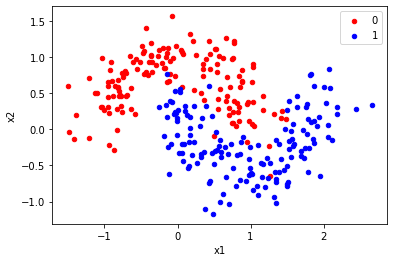

In [2]:
### This function allows to plot the two moons
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset`, by plotting the moons for different values

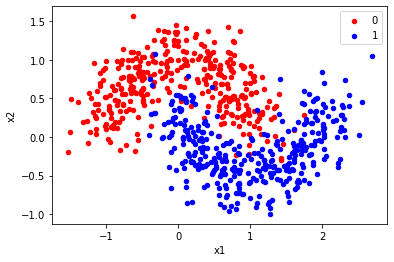

In [3]:
# YOUR CODE HERE
X, y = make_moons(n_samples=700, noise=0.25, random_state=0)
plot_moons(X, y)

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

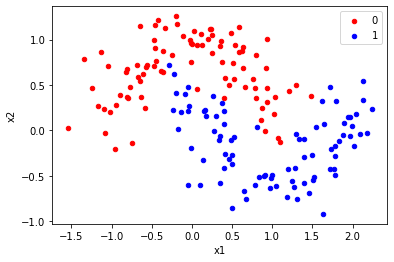

In [4]:
# YOUR CODE HERE
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

plot_moons(X_train, y_train)



## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [5]:
y_train.shape

(175,)

In [6]:
X_train.shape

(175, 2)

In [ ]:
#prob de shape entre mon X_train et y_train , X_train 2dimension,
#on doit changer l'output à 1 plutot que 2

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(5,input_dim=2, activation='relu')) # 1
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model architecture
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()


2021-11-08 12:27:14.891137: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have already seen in Machine-Learning.

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [8]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= 'accuracy')

You are now ready to train your algorithm on the training set:

In [10]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=8,
                    verbose=1) # Try different verbose

2021-11-08 12:27:20.249269: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.6419 - accuracy: 0.6343
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6743
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7086
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7314
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7486
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7600
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7657
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7886
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.8114
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8171
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8571
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8571
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8571
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8571
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8571
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8571
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8571
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8571
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8629
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8629
Epoch 93/100


### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [69]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x15db90430>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [1.0110981464385986,
   0.969102680683136,
   0.9308269619941711,
   0.8958518505096436,
   0.8630402684211731,
   0.8343472480773926,
   0.8075659871101379,
   0.7828542590141296,
   0.7599459290504456,
   0.7388216853141785,
   0.7193746566772461,
   0.7009870409965515,
   0.6843741536140442,
   0.6681563854217529,
   0.6533654928207397,
   0.6388477683067322,
   0.6253700852394104,
   0.6125591993331909,
   0.601152777671814,
   0.5897724628448486,
   0.5794808268547058,
   0.5694971680641174,
   0.5600886940956116,
   0.5512475371360779,
   0.5430405735969543,
   0.5356994867324829,
   0.5288156867027283,
   0.5225599408149719,
   0.5170368552207947,
   0.5117020606994629,
   0.5065487027168274,
   0.5017188191413879,
   0.49724823236465454,
   0.4928704798221588,
   0.4883883595466614,
   0.4843895

❓ Plot the history of the train loss using the following function

In [6]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [0]:
# YOUR CODE HERE

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [11]:
y_pred = model.predict(X_test)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[0.29396238923072815, 0.8399999737739563]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [13]:
# YOUR CODE HERE
accuracy = 0.83999

In [15]:
model.evaluate(scaler.transform(X_test), y_test)


NameError: name 'scaler' is not defined

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

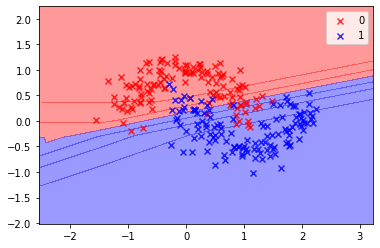

In [16]:
from utils.plots import plot_decision_regions
plot_decision_regions(X,y, model)

🧪 Test your code

In [17]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [18]:
y_train.shape

(175,)

In [19]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=500,
                    batch_size=8,
                    verbose=0)


In [46]:
# YOUR CODE HERE


❓ Did the test accuracy improve?

In [20]:
# YOUR CODE HERE
model.evaluate(X_test, y_test, verbose=0)

[0.2702288031578064, 0.8533333539962769]

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [39]:
def initialize_model_2():
    ### Model architecture
    model = Sequential()
    model.add(layers.Dense(20, input_dim = 2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
 
    ### Model optimization : Optimized, loss and metric
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model?

In [40]:
# YOUR CODE HERE
model.summary()
number_of_params = 391

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [41]:
# YOUR CODE HERE
history = model.fit(X_train, y_train, 
                    epochs=500,
                    batch_size=8,
                    verbose=0)

In [42]:
model.evaluate(X_test, y_test, verbose=0)

[0.8445595502853394, 0.9333333373069763]

In [43]:
# YOUR CODE HERE
accuracy_deep = 0.9333333373069763

❓ Do you think we have overfitted on the noise? Check it out below

In [33]:
from utils.plots import plot_decision_regions

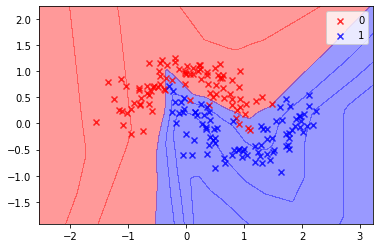

In [34]:
plot_decision_regions(X_train,y_train, model)

🧪 **Test your code**

In [44]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


🏁 **Congratulations! Push and commmit this notebook before moving to the next**